In [ ]:
! pip install llama-index-vector-stores-lancedb
! pip install llama-index-multi-modal-llms-openai
! pip install llama-index-embeddings-clip

In [ ]:
! pip install llama-index ftfy regex tqdm
! pip install -U openai-whisper
! pip install torch torchvision
! pip install matplotlib scikit-image
! pip install lancedb
! pip install moviepy
! pip install pytube
! pip install pydub
! pip install SpeechRecognition
! pip install ffmpeg-python
! pip install soundfile
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-sjo7c0__
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-sjo7c0__
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [ ]:
! pip install pytubefix
! pip install llama-index-readers-file

In [ ]:
from moviepy.editor import VideoFileClip
from pytubefix import YouTube
from pathlib import Path
import speech_recognition as sr
from pprint import pprint

In [ ]:
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPEN_AI_KEY')

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
video_url = "https://www.youtube.com/watch?v=3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [ ]:
file_path = output_video_path + "input_video.mp4"

In [ ]:
file_path

'/content/video_data/input_video.mp4'

In [ ]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

In [ ]:
def download_video(url,output_path):
  yt = YouTube(url)
  meta_data = {"Author":yt.author,"Title":yt.title,"Length":yt.length,"Views":yt.views}
  yt.streams.get_highest_resolution().download(output_path=output_path,filename = "input_video.mp4")
  return meta_data

In [ ]:
def video_to_image(video_path,output_folder):
  clip = VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),
      fps=0.2,
  )

In [ ]:
def video_to_audio(video_path,output_audio_path):
  video_clip = VideoFileClip(video_path)
  audio_clip = video_clip.audio
  audio_clip.write_audiofile(output_audio_path)

In [ ]:
def audio_to_text(audio_path):
  recognizer = sr.Recognizer()
  audio = sr.AudioFile(audio_path)
  with audio as source:
    audio_data = recognizer.record(source)
    try:
      text = recognizer.recognize_whisper(audio_data)
    except sr.UnknownValueError:
      print("Google Speech Recognition could not understand audio")

  return text


In [ ]:
video_url,output_video_path

('https://www.youtube.com/watch?v=3dhcmeOTZ_Q', '/content/video_data/')

In [ ]:
video_metadata = download_video(video_url,output_video_path)

In [ ]:
video_metadata

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Length': 234,
 'Views': 9426}

In [ ]:
file_path, output_folder

('/content/video_data/input_video.mp4', '/content/mixed_data/')

In [ ]:
! mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [ ]:
video_to_image(file_path,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [ ]:
file_path, output_audio_path

('/content/video_data/input_video.mp4', '/content/mixed_data/output_audio.wav')

In [ ]:
audio_data = video_to_audio(file_path,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [ ]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [ ]:
text_data = audio_to_text(output_audio_path)
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [ ]:
with open(output_folder + "output.txt","w") as f:
  f.write(text_data)

In [ ]:
os.remove(output_audio_path)

In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader, StorageContext

In [ ]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [ ]:
text_store = LanceDBVectorStore(uri="Multimodel_lancedb",table_name="text_collection")
image_store = LanceDBVectorStore(uri="Multimodel_lancedb",table_name="image_collection")

In [ ]:
storage_context = StorageContext.from_defaults(vector_store=text_store,image_store = image_store)

In [ ]:
documents = SimpleDirectoryReader(output_folder).load_data()

In [ ]:
documents

[ImageDocument(id_='d1510194-76d0-40fd-b5c2-6b89f83ca630', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 750, 'creation_date': '2024-09-02', 'last_modified_date': '2024-09-02'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='0a2745bd-d314-4842-808d-3861447e6563', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 

In [ ]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

In [ ]:
retriever_engine = index.as_retriever(similarity_top_k=3,image_similarity_top_k=3)

In [ ]:
import json

metadata_str = json.dumps(video_metadata)

In [ ]:
qa_template_str = (
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [ ]:
query_str = "What is Linear Regression in ML?"

In [ ]:
retrieval_result = retriever_engine.retrieve(query_str)

In [ ]:
retrieval_result

[NodeWithScore(node=TextNode(id_='8a3ba5bc-0662-4f66-94e7-b7fe1a78e9a2', embedding=[-0.010929888114333153, 0.002100982703268528, -0.0019798048306256533, -0.013667481020092964, -0.014391133561730385, 0.0010496379109099507, 0.0018569204257801175, 0.011476041749119759, -0.03353380039334297, -0.044211093336343765, -0.00448186881840229, 0.02672053873538971, -0.00032342501799575984, 0.026747846975922585, 0.007591527886688709, -0.016958052292466164, 0.026543039828538895, 0.010656812228262424, 0.04210840165615082, -0.01663036085665226, -0.03326072171330452, 0.014609594829380512, -0.014309210702776909, -0.01863747462630272, -0.01441844180226326, -0.016193438321352005, 0.030338803306221962, -0.020002856850624084, 0.007489124312996864, -0.000619115715380758, 0.012090464122593403, -0.006376337260007858, -0.010827484540641308, -0.022433238103985786, -0.01006969716399908, -0.02043977938592434, 0.012868732213973999, 0.0017886513378471136, 0.022173814475536346, -0.017545167356729507, 0.023580159991979

In [ ]:
retrieved_images = []
retrieved_text = []

for res_node in retrieval_result:
  if isinstance(res_node.node,ImageNode):
    retrieved_images.append(res_node.node.metadata["file_path"])
  else:
    display_source_node(res_node,source_length=200)
    retrieved_text.append(res_node.text)

**Node ID:** 8a3ba5bc-0662-4f66-94e7-b7fe1a78e9a2<br>**Similarity:** 0.7670990824699402<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
retrieved_images

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0027.png']

In [ ]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [ ]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [ ]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 8a3ba5bc-0662-4f66-94e7-b7fe1a78e9a2<br>**Similarity:** 0.7670990824699402<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

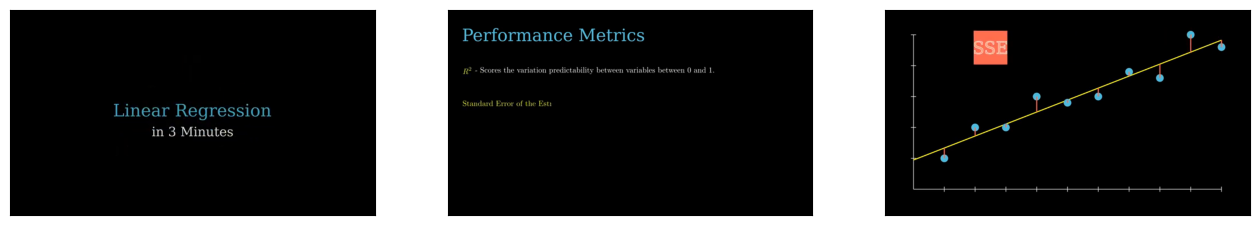

In [ ]:
image_doc = SimpleDirectoryReader(input_dir = output_folder,input_files=img).load_data()
context_str = "".join(txt)
plot_images(img)

**Node ID:** 8a3ba5bc-0662-4f66-94e7-b7fe1a78e9a2<br>**Similarity:** 0.7592061758041382<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

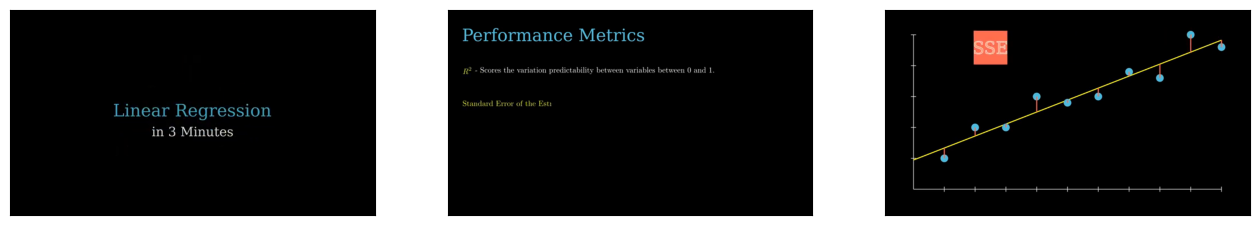

In [ ]:
query_str1 = "What is multiple linear regression?"
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str1)
image_doc = SimpleDirectoryReader(input_dir = output_folder,input_files=img).load_data()
context_str = "".join(txt)
plot_images(img)

In [ ]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [ ]:
openai_model = OpenAIMultiModal(model="gpt-4o-mini",max_new_tokens=1500)

In [ ]:
result = openai_model.complete(
    prompt=qa_template_str.format(
        context_str=context_str,
        metadata_str=metadata_str,
        query_str=query_str
    ),
    image_documents=image_doc
)

In [ ]:
result

CompletionResponse(text='Linear regression in machine learning is a statistical technique used to model the relationship between an output variable (dependent variable) and one or more input variables (independent variables). It involves fitting a line through data points to make predictions based on the assumption of a linear relationship. The equation typically used is \\( y = mx + b \\), where \\( m \\) (or \\( \\beta_1 \\)) represents the slope of the line and \\( b \\) (or \\( \\beta_0 \\)) represents the intercept. \n\nIn cases with multiple input variables, the model can be extended to include additional terms, visualized as a hyperplane in higher dimensions. The goal is to minimize the sum of squared errors (SSE) between the predicted values and the actual data points, which is achieved through various techniques such as gradient descent. \n\nTo validate the model, data is often split into training and test sets, and performance metrics like R-squared and standard error of the 

In [ ]:
pprint(result)

CompletionResponse(text='Linear regression in machine learning is a statistical technique used to model the relationship between an output variable (dependent variable) and one or more input variables (independent variables). It involves fitting a line through data points to make predictions based on the assumption of a linear relationship. The equation typically used is \\( y = mx + b \\), where \\( m \\) (or \\( \\beta_1 \\)) represents the slope of the line and \\( b \\) (or \\( \\beta_0 \\)) represents the intercept. \n\nIn cases with multiple input variables, the model can be extended to include additional terms, visualized as a hyperplane in higher dimensions. The goal is to minimize the sum of squared errors (SSE) between the predicted values and the actual data points, which is achieved through various techniques such as gradient descent. \n\nTo validate the model, data is often split into training and test sets, and performance metrics like R-squared and standard error of the 

In [ ]:
pprint(result.text)

('Linear regression in machine learning is a statistical technique used to '
 'model the relationship between an output variable (dependent variable) and '
 'one or more input variables (independent variables). It involves fitting a '
 'line through data points to make predictions based on the assumption of a '
 'linear relationship. The equation typically used is \\( y = mx + b \\), '
 'where \\( m \\) (or \\( \\beta_1 \\)) represents the slope of the line and '
 '\\( b \\) (or \\( \\beta_0 \\)) represents the intercept. \n'
 '\n'
 'In cases with multiple input variables, the model can be extended to include '
 'additional terms, visualized as a hyperplane in higher dimensions. The goal '
 'is to minimize the sum of squared errors (SSE) between the predicted values '
 'and the actual data points, which is achieved through various techniques '
 'such as gradient descent. \n'
 '\n'
 'To validate the model, data is often split into training and test sets, and '
 'performance metrics like

In [ ]:
openai_model.complete(
    prompt="what is saurav sabu",
    image_documents=image_doc
)

CompletionResponse(text="It looks like you're referencing a video or presentation about linear regression, possibly created by someone named Saurav Sabu. Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. \n\nIf you have specific questions about linear regression or the content in the images, feel free to ask!", additional_kwargs={}, raw=ChatCompletion(id='chatcmpl-A371UnMoVy4fzpmdILNfYyUvhUwDV', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="It looks like you're referencing a video or presentation about linear regression, possibly created by someone named Saurav Sabu. Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. \n\nIf you have specific questions about linear regression or the content in the images, feel free to ask!", refusal=None, role='assistant'